In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()



,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
if "patientid" in df.columns:
    df = df.drop("patientid",axis=1)

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB
None
              age       gender    chestpain    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.00

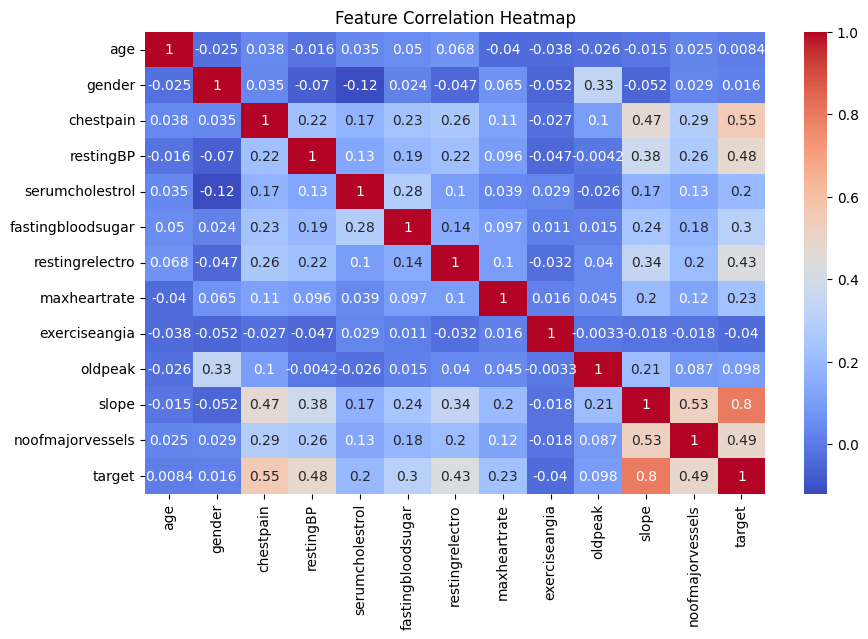

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

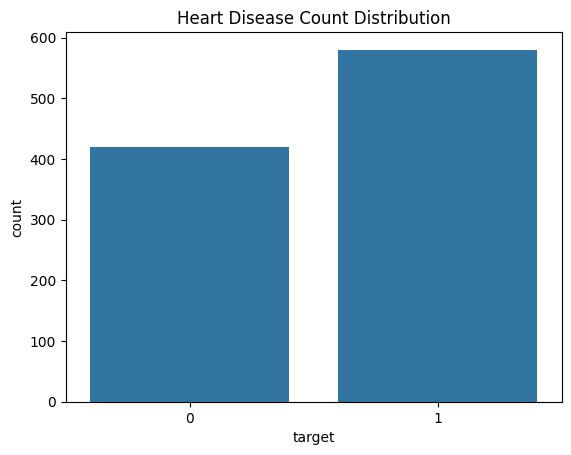

In [6]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Count Distribution")
plt.show()

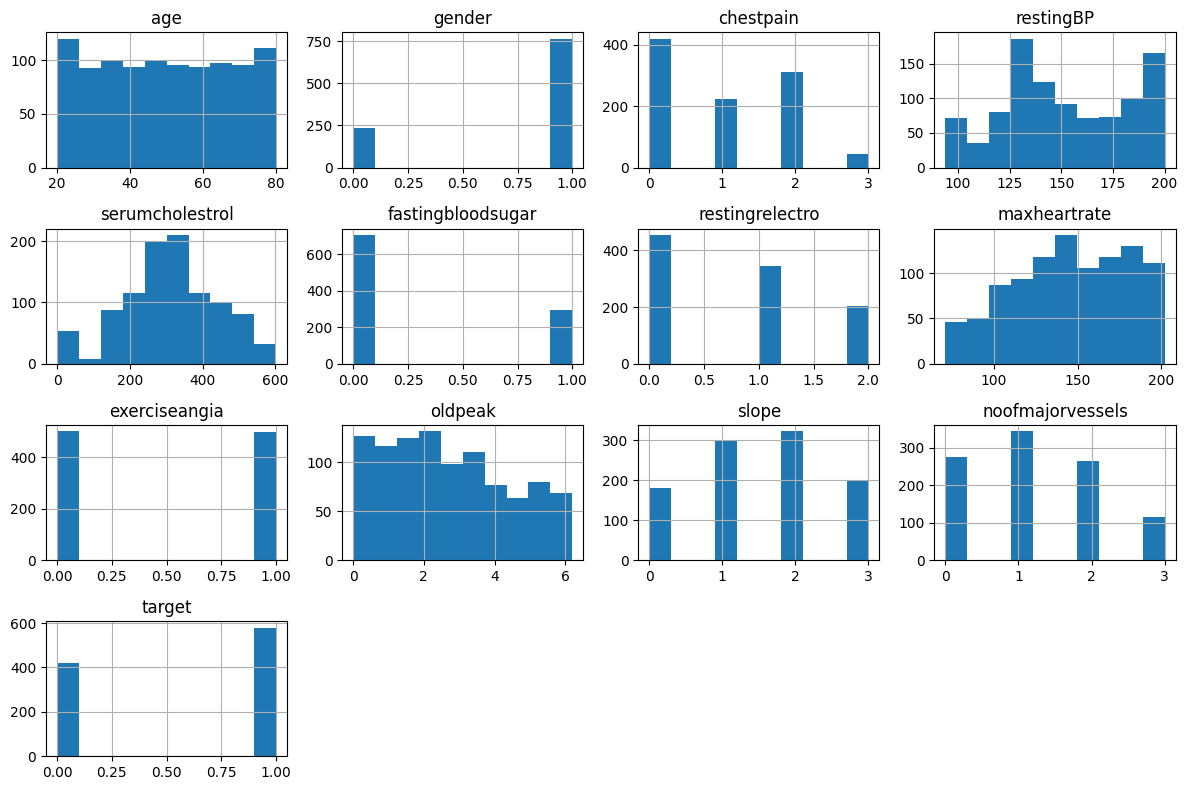

In [7]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

In [8]:
# Splitting features and target
X = df.drop("target", axis=1)
y = df["target"]

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    acc = accuracy_score(y_test, prediction)
    results[name] = acc
    print(f"📌 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print("Classification Report:\n", classification_report(y_test, prediction))
    print("-"*50)

📌 Model: Logistic Regression
Accuracy: 0.965
Confusion Matrix:
 [[ 79   4]
 [  3 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

--------------------------------------------------
📌 Model: KNN
Accuracy: 0.935
Confusion Matrix:
 [[ 78   5]
 [  8 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.96      0.93      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

--------------------------------------------------
📌 Model: SVM
Accuracy: 0.98
Confusion 

In [10]:
best_model_name = max(results, key=results.get)
print("\n🔥 Best Model Found:", best_model_name, "with accuracy:", results[best_model_name])


🔥 Best Model Found: Random Forest with accuracy: 0.985


In [11]:
import joblib

joblib.dump(best_model_name, "heart.pkl")
print("Model saved successfully!")

Model saved successfully!
